# Statistics for the Top 10 songs of various spotify artists and their YouTube video.
In this project, we aimed to analyze the relationship between YouTube views and various audio features of the top 10 songs of various Spotify artists. We collected and cleaned the data using libraries such as pandas, and conducted the analysis using libraries like Matplotlib and Seaborn. The findings revealed that there was a weak positive correlation between the tempo and loudness of the songs and their YouTube views, indicating that songs with higher tempo and loudness tend to have more views on YouTube. These insights can be valuable for artists and music producers looking to create music that appeals to a broad audience and gains more popularity. Overall, this project highlights the importance of audio features in the success of a song on a popular platform like YouTube, and the role that data analysis can play in understanding and improving music production.

## Downloading the Dataset

The dataset is downloaded from kaggle. The link for dataset is [link text](https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube)

In [2]:
!pip install jovian opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


Let's begin by downloading the data, and listing the files within the dataset.

##Select a real-world dataset

In [3]:

dataset_url = 'https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prabhiraj
Your Kaggle Key: ··········


100%|██████████| 8.95M/8.95M [00:00<00:00, 32.5MB/s]


The dataset has been downloaded and extracted.

In [5]:
# Change this
data_dir = '/content/spotify-and-youtube'

In [6]:
import os
os.listdir(data_dir)

['Spotify_Youtube.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "spotify-and-youtube-zerotopandas-course-project" # change this (use lowercase letters and hyphens only)

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## **Perform data preparation & cleaning**

Importing pandas and transforming csv into Dataframe



In [11]:
import pandas as pd

In [12]:
file_path='/content/spotify-and-youtube/Spotify_Youtube.csv'

In [13]:
data_df=pd.read_csv(file_path)

## Exploring Dataset
exploring shape and info of dataset

In [14]:
data_df.shape

(20718, 28)

In [15]:
data_df

Unnamed: 0       Artist  \
0               0     Gorillaz   
1               1     Gorillaz   
2               2     Gorillaz   
3               3     Gorillaz   
4               4     Gorillaz   
...           ...          ...   
20713       20713  SICK LEGEND   
20714       20714  SICK LEGEND   
20715       20715  SICK LEGEND   
20716       20716  SICK LEGEND   
20717       20717  SICK LEGEND   

                                             Url_spotify  \
0      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
1      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
2      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
3      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
4      https://open.spotify.com/artist/3AA28KZvwAUcZu...   
...                                                  ...   
20713  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20714  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20715  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20716  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
20717  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   

                                               Track  \
0                                     Feel Good Inc.   
1                                    Rhinestone Eyes   
2      New Gold (feat. Tame Impala and Bootie Brown)   
3                                 On Melancholy Hill   
4                                     Clint Eastwood   
...                                              ...   
20713                           JUST DANCE HARDSTYLE   
20714                 SET FIRE TO THE RAIN HARDSTYLE   
20715                      OUTSIDE HARDSTYLE SPED UP   
20716                            ONLY GIRL HARDSTYLE   
20717                             MISS YOU HARDSTYLE   

                                               Album Album_type  \
0                                         Demon Days      album   
1                                      Plastic Beach      album   
2      New Gold (feat. Tame Impala and Bootie Brown)     single   
3                                      Plastic Beach      album   
4                                           Gorillaz      album   
...                                              ...        ...   
20713                           JUST DANCE HARDSTYLE     single   
20714                 SET FIRE TO THE RAIN HARDSTYLE     single   
20715                      OUTSIDE HARDSTYLE SPED UP     single   
20716                            ONLY GIRL HARDSTYLE     single   
20717                             MISS YOU HARDSTYLE     single   

                                        Uri  Danceability  Energy   Key  ...  \
0      spotify:track:0d28khcov6AiegSCpG5TuT         0.818   0.705   6.0  ...   
1      spotify:track:1foMv2HQwfQ2vntFf9HFeG         0.676   0.703   8.0  ...   
2      spotify:track:64dLd6rVqDLtkXFYrEUHIU         0.695   0.923   1.0  ...   
3      spotify:track:0q6LuUqGLUiCPP1cbdwFs3         0.689   0.739   2.0  ...   
4      spotify:track:7yMiX7n9SBvadzox8T5jzT         0.663   0.694  10.0  ...   
...                                     ...           ...     ...   ...  ...   
20713  spotify:track:0RtcKQGyI4hr8FgFH1TuYG         0.582   0.926   5.0  ...   
20714  spotify:track:3rHvPA8lUnPBkaLyPOc0VV         0.531   0.936   4.0  ...   
20715  spotify:track:4jk00YxPtPbhvHJE9N4ddv         0.443   0.830   4.0  ...   
20716  spotify:track:5EyErbpsugWliX006eTDex         0.417   0.767   9.0  ...   
20717  spotify:track:6lOn0jz1QpjcWeXo1oMm0k         0.498   0.938   6.0  ...   

                                       Url_youtube  \
0      https://www.youtube.com/watch?v=HyHNuVaZJ-k   
1      https://www.youtube.com/watch?v=yYDmaexVHic   
2      https://www.youtube.com/watch?v=qJa-VFwPpYA   
3      https://www.youtube.com/watch?v=04mfKJWDSzI   
4      https://www.youtube.com/watch?v=1V_xRb0x9aw   
...                                            ...   
20713  https://www.youtube.com/watch?v=5SHmKFKlNqI   
20714 

##Cleaning Dataset

In [16]:
data_df.isna().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [17]:
#cheking Datatype of every values
data_df.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

Views is object type nees to chande into float

In [66]:
data_df['Track']=data_df['Track'].astype(str)

In [67]:
#cleaning data 
#loudness
data_df.Loudness.fillna(data_df['Loudness'].mean(),inplace=True) 
colum=['Url_youtube','Title','Channel','Comments','Description','Licensed','official_video','Stream']  
for i in  colum:
  data_df[i].fillna('unknown',inplace=True)
#colum need t be replaced by mean
mean_colum=['Danceability','Energy','Key','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Duration_ms','Views','Likes']
for i in mean_colum:
  data_df[i].fillna(data_df[i].mean(),inplace=True)

In [68]:
data_df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [69]:
data_df.describe()

Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  20718.000000  20718.000000  20718.000000  20718.000000  20718.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165264      0.214136      3.576276      4.632525   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518250      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536500   
75%    15537.750000      0.740000      0.798000      8.000000     -4.931250   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20718.000000  20718.000000      20718.000000  20718.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111955      0.286285          0.193253      0.168523   
min        0.000000      0.000001          0.000000      0.014500   
25%        0.035700      0.045200          0.000000      0.094125   
50%        0.050500      0.193000          0.000002      0.125000   
75%        0.103000      0.477000          0.000463      0.237000   
max        0.964000      0.996000          1.000000      1.000000   

            Valence        Tempo   Duration_ms         Views         Likes  
count  20718.000000  20718.00000  2.071800e+04  2.071800e+04  2.071800e+04  
mean       0.529853    120.63834  2.247176e+05  9.393782e+07  6.633411e+05  
std        0.245429     29.57759  1.247845e+05  2.715111e+08  1.765807e+06  
min        0.000000      0.00000  3.098500e+04  0.000000e+00  0.000000e+00  
25%        0.339000     97.00200  1.800100e+05  1.950563e+06  2.302175e+04  
50%        0.537000    119.96550  2.132910e+05  1.572401e+07  1.354555e+05  
75%        0.726000    139.93500  2.524422e+05  7.798379e+07  5.897498e+05  
max        0.993000    243.37200  4.676058e+06  8.079649e+09  5.078865e+07

In [70]:
import jovian

In [71]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Analysis and Visualization

**TODO** 


*   Compute the mean, sum, range and other interesting statistics for numeric columns
*   Explore distributions of numeric columns using histograms etc.




*   Explore relationship between columns using scatter plots, bar charts etc.
*   Make a note of interesting insights from the exploratory analysis




In [72]:
import seaborn as sns #imported seaborn
import matplotlib   
import matplotlib.pyplot as plt
%matplotlib inline


Finding the most played song 

Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'

In [73]:
#to sort1st 10 top song
top_album_df=(data_df.sort_values(by='Views',ascending=False))[:100]

In [74]:
top_album_df['Track']=top_album_df['Track'].astype(str)
top_album_df['Track']

1147                                   Despacito
365                                    Despacito
12452                               Shape of You
14580         See You Again (feat. Charlie Puth)
12469         See You Again (feat. Charlie Puth)
                          ...                   
47                          Hymn for the Weekend
15267                              Felices los 4
16250    Déjala Que Vuelva (feat. Manuel Turizo)
14043                       Just the Way You Are
254                                Cheap Thrills
Name: Track, Length: 100, dtype: object

###Top 100 track with most views.
The track in first position is Despacito. Despacito is a Spanish-language song by Puerto Rican singer Luis Fonsi featuring Puerto Rican rapper Daddy Yankee.

In [75]:
#data_df['Track'].groupby('Artist').count()
data_df.groupby('Artist')['Track'].count()[10:100]


Artist
3 Doors Down           10
42 Dugg                10
5 Seconds of Summer    10
50 Cent                10
6LACK                  10
                       ..
Ananya Bhat             7
Anderson .Paak         10
Andrea Bocelli         10
Andrés Calamaro        10
Andrés Cepeda          10
Name: Track, Length: 90, dtype: int64

<ipython-input-76-59ac3da3db5e>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o--r" (-> color='r'). The keyword argument will take precedence.
  plt2.plot(top_album_df['Track'],top_album_df['Likes'],'o--r',color='red');
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core

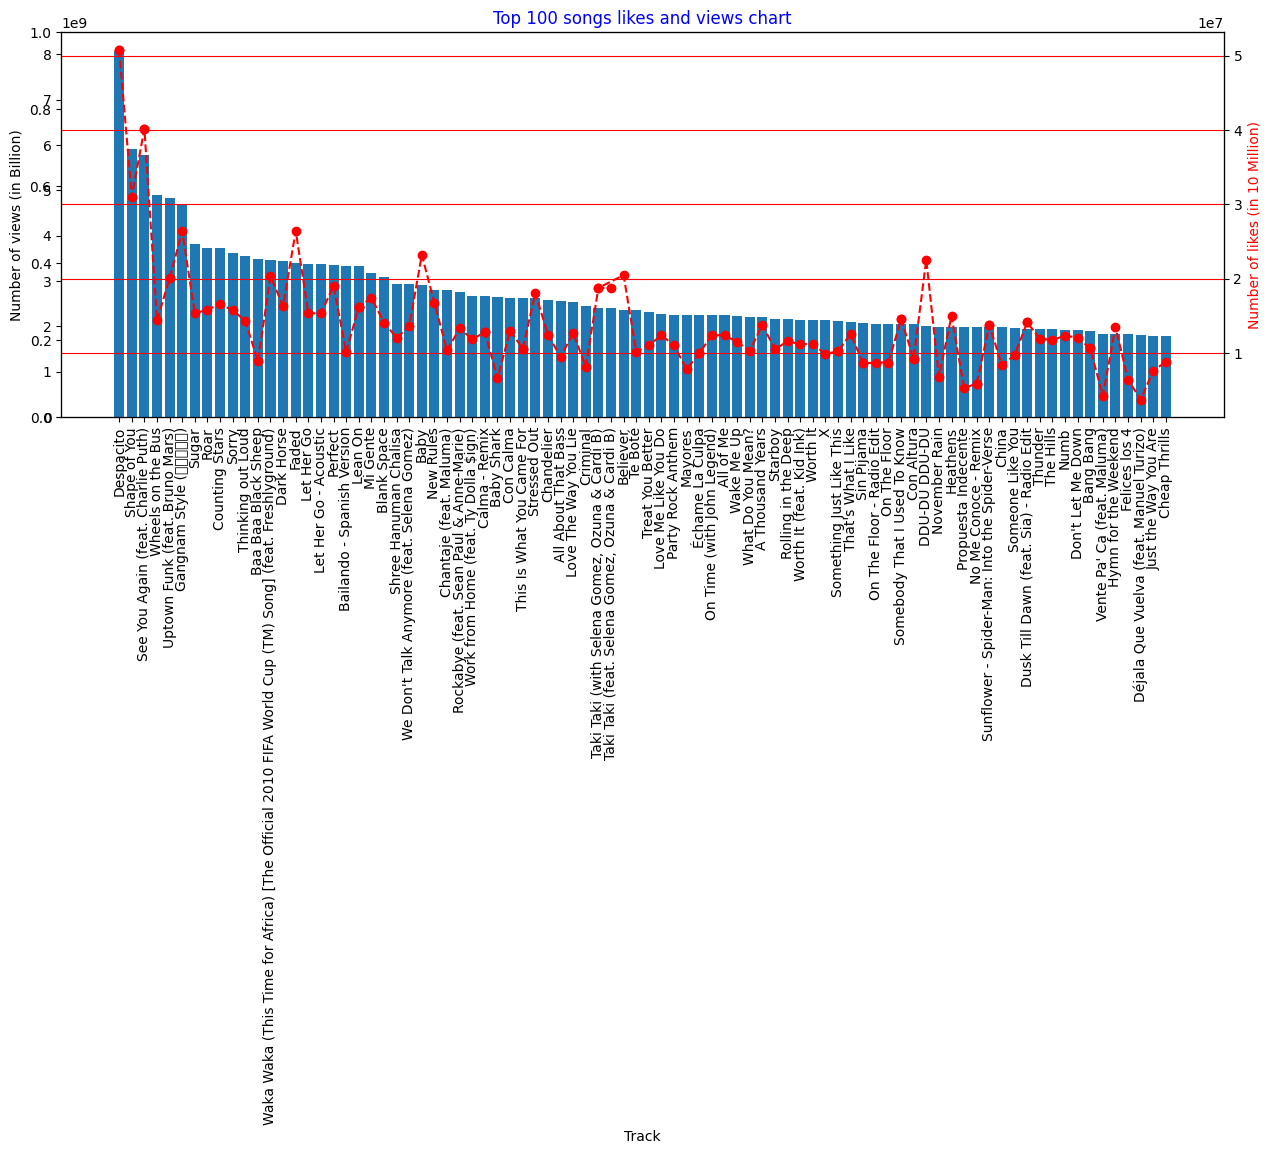

In [76]:
plt.figure(figsize=(15,5))
plt.xlabel('Track');
plt.ylabel('Number of views (in Billion)');
plt.title('Top 100 songs likes and views chart',color='blue');
#plt.legend()
plt.xticks(rotation=90);
pl2=plt.twinx()
plt.bar(top_album_df['Track'],top_album_df['Views'],label=top_album_df['Album_type']);
plt2=plt.twinx()
plt2.set_ylabel("Number of likes (in 10 Million)",color='red')
plt2.grid(True,axis='both',color='red');
pl2.patch.set_facecolor("lightgray");
plt2.plot(top_album_df['Track'],top_album_df['Likes'],'o--r',color='red');
#plt.xtricks(torotation=90);


###Number of views each artist got

In [77]:
for i in range(0,len(data_df['Artist'])): #code to replace $ with s in artist
  data_df['Artist'][i]=data_df['Artist'][i].replace('$','s')
for i in range(0,len(data_df['Channel'])): #code to replace $ with s in artist
   data_df['Channel'][i]=data_df['Channel'][i].replace('$','s')

<ipython-input-77-7ecf9504902b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Artist'][i]=data_df['Artist'][i].replace('$','s')
<ipython-input-77-7ecf9504902b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['Channel'][i]=data_df['Channel'][i].replace('$','s')


In [78]:
artist_views = data_df[data_df['Views'] > 1748130945.0].groupby('Artist')['Views'].sum()

#new df with view greater than average view

In [79]:
artist_views.index

Index(['Adele', 'Alan Walker', 'Avicii', 'BLACKPINK', 'Becky G', 'Bruno Mars',
       'Calvin Harris', 'Charlie Puth', 'Christina Perri', 'Clean Bandit',
       'CoComelon', 'Coldplay', 'DJ Snake', 'Daddy Yankee', 'Darell',
       'Demi Lovato', 'Dua Lipa', 'Ed Sheeran', 'Ellie Goulding', 'Eminem',
       'Enrique Iglesias', 'Farruko', 'Fifth Harmony', 'Gotye',
       'Guns N' Roses', 'Hariharan', 'Imagine Dragons', 'J Balvin',
       'Jennifer Lopez', 'Jessie J', 'Jhayco', 'John Legend', 'Justin Bieber',
       'KAROL G', 'Katy Perry', 'Kimbra', 'LMFAO', 'Linkin Park', 'Luis Fonsi',
       'Major Lazer', 'Maluma', 'Mark Ronson', 'Maroon 5', 'Meghan Trainor',
       'MØ', 'Natti Natasha', 'Nicki Minaj', 'Nicky Jam', 'OneRepublic',
       'Ozuna', 'PSY', 'Passenger', 'Pedro Capó', 'Piso 21', 'Post Malone',
       'ROSALÍA', 'Ricky Martin', 'Rihanna', 'Romeo Santos', 'Selena Gomez',
       'Shakira', 'Shawn Mendes', 'Sia', 'Swae Lee', 'Taylor Swift',
       'The Chainsmokers', 'The Weekn

<BarContainer object of 95 artists>

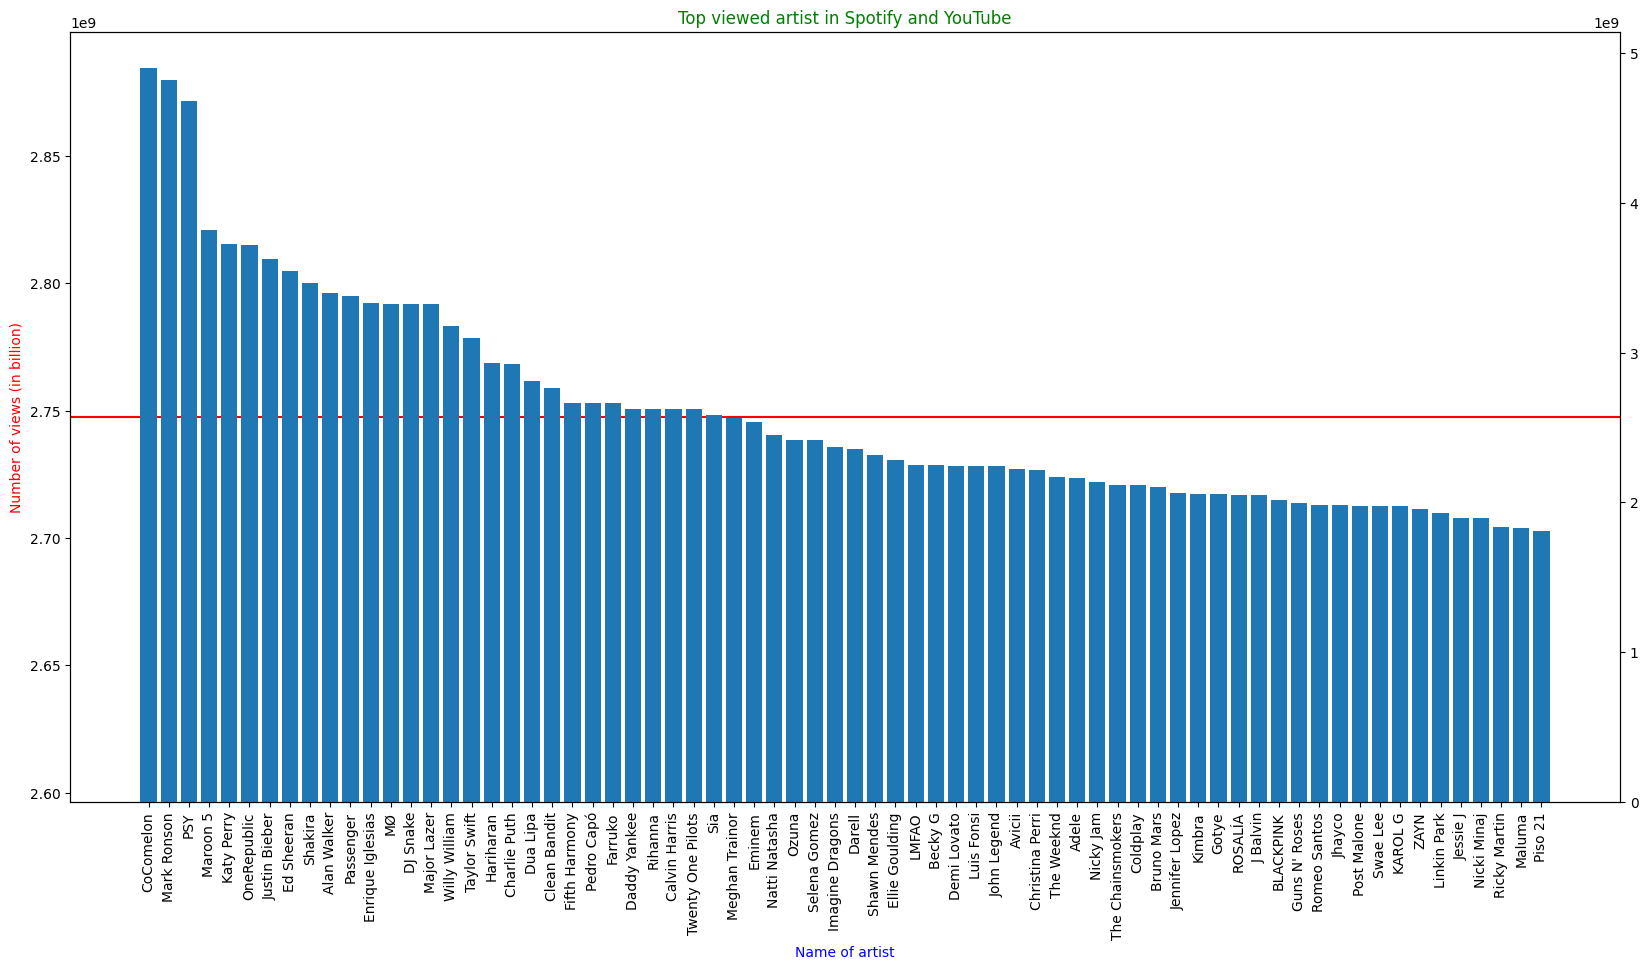

In [80]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title('Top viewed artist in Spotify and YouTube',color="Green")
plt.ylabel("Number of views (in billion)",color="red")
plt.xlabel("Name of artist",color="blue")
plt.axhline(top_album_df['Views'].mean(),color="red")
plt2=plt.twinx()
plt.bar(top_album_df['Artist'][5:100],top_album_df['Views'][5:100])
#pl2.plot(top_album_df['Artist'],top_album_df['likes'])

In [81]:
#index of max value of dancebility
index_mad_dan=data_df['Danceability'].idxmax()

In [82]:
index_mad_dan

750

In [83]:
data_df.Album_type.unique()

array(['album', 'single', 'compilation'], dtype=object)

###Chart between Danceability and tempo 

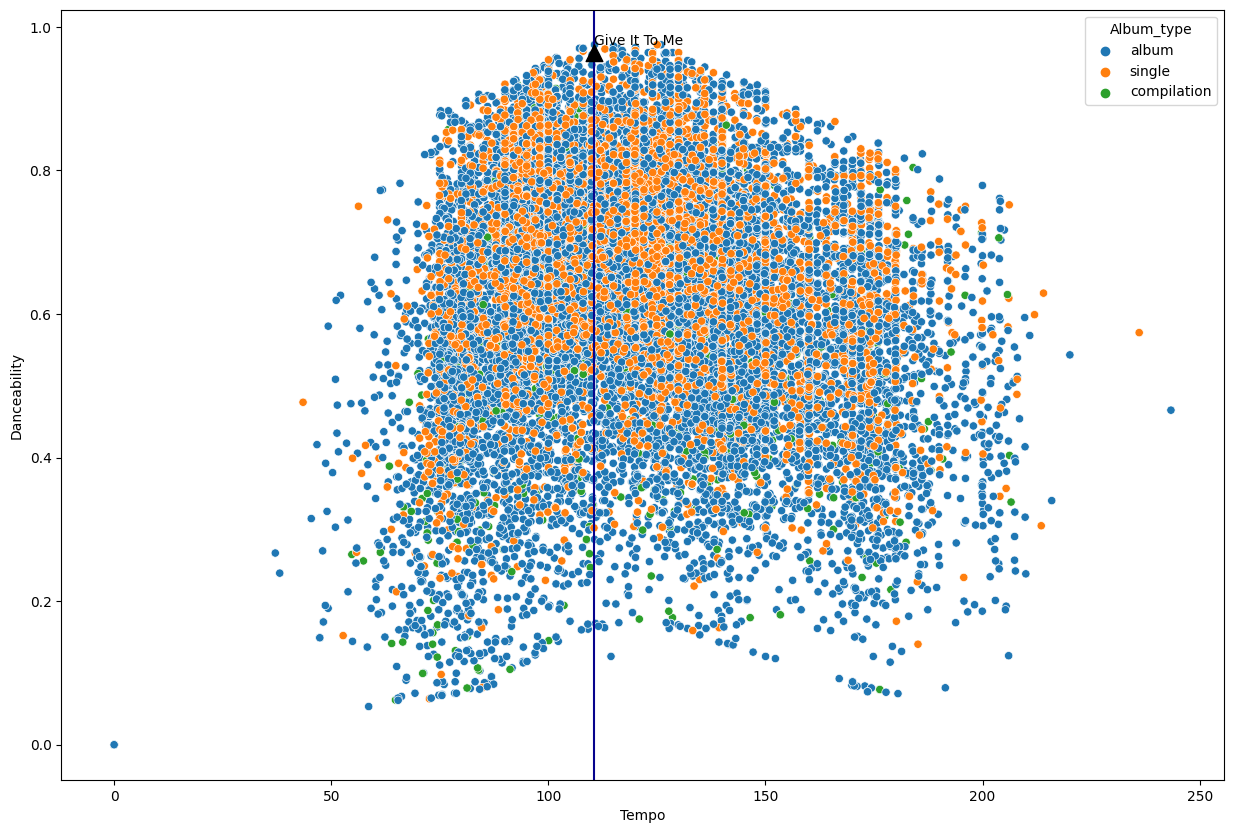

In [84]:
#sns plot toloudness to dancebility
plt.figure(figsize=(15,10))
plt.annotate(data_df.Track[index_mad_dan],xy=(data_df.Tempo[index_mad_dan],data_df.Danceability[index_mad_dan]),arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(data_df.Tempo[index_mad_dan],color='#06038D')
#sns.regplot(x=data_df['Tempo'],y=data_df['Danceability'],data=data_df)
sns.scatterplot(x=data_df['Tempo'],y=data_df['Danceability'],hue=data_df.Album_type);

The chart between tempo and danceabilty is ploted. From the chart we can clearly under stand there is a sweet tempo point for max dancebility. the song "Give to me is the most danceabile song in the data set tempo near to 110

###Chart between Danceability vs views. 

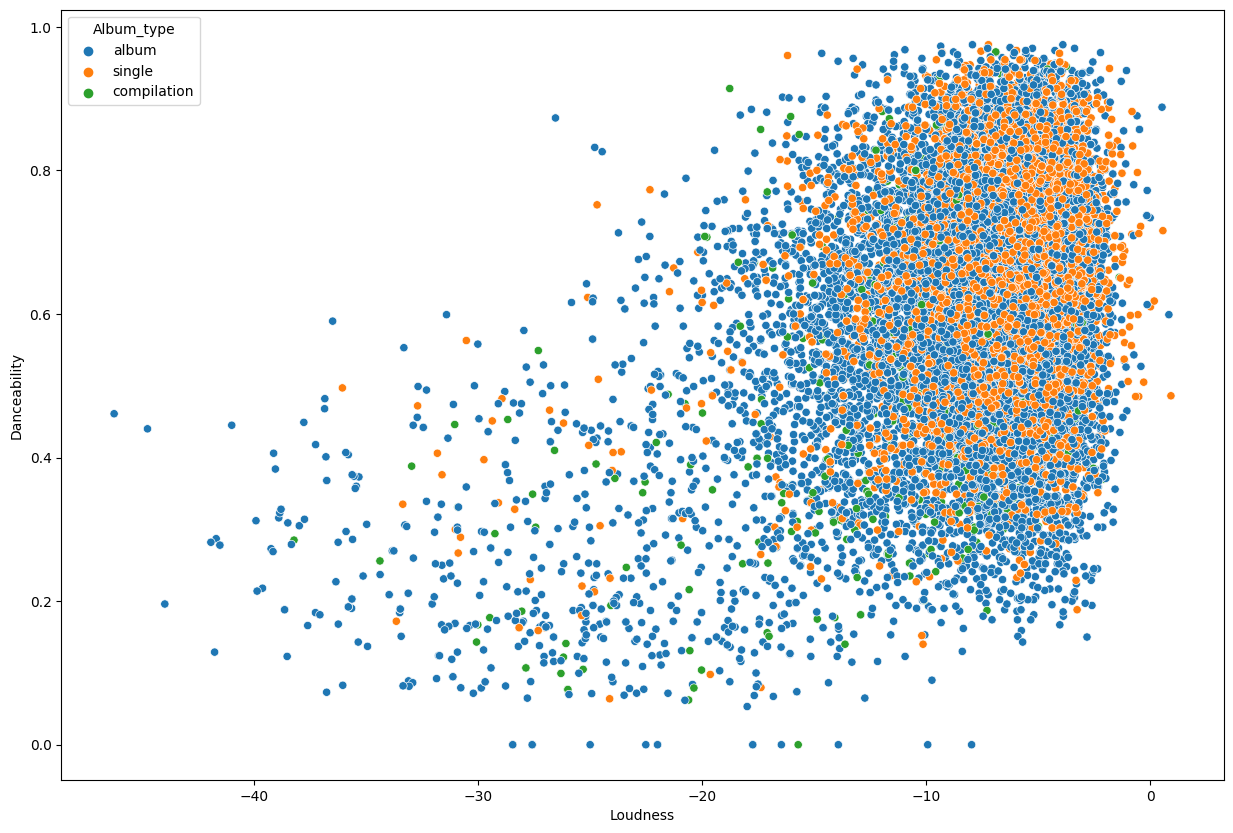

In [85]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=data_df['Loudness'],y=data_df['Danceability'],hue=data_df.Album_type);

###Ploted chart between Speechiness vs views.From the chart it is understood songs with high Speechiness have less views

In [86]:
mean_view=data_df[data_df['Views']<9393782]

<Axes: xlabel='Views', ylabel='Speechiness'>

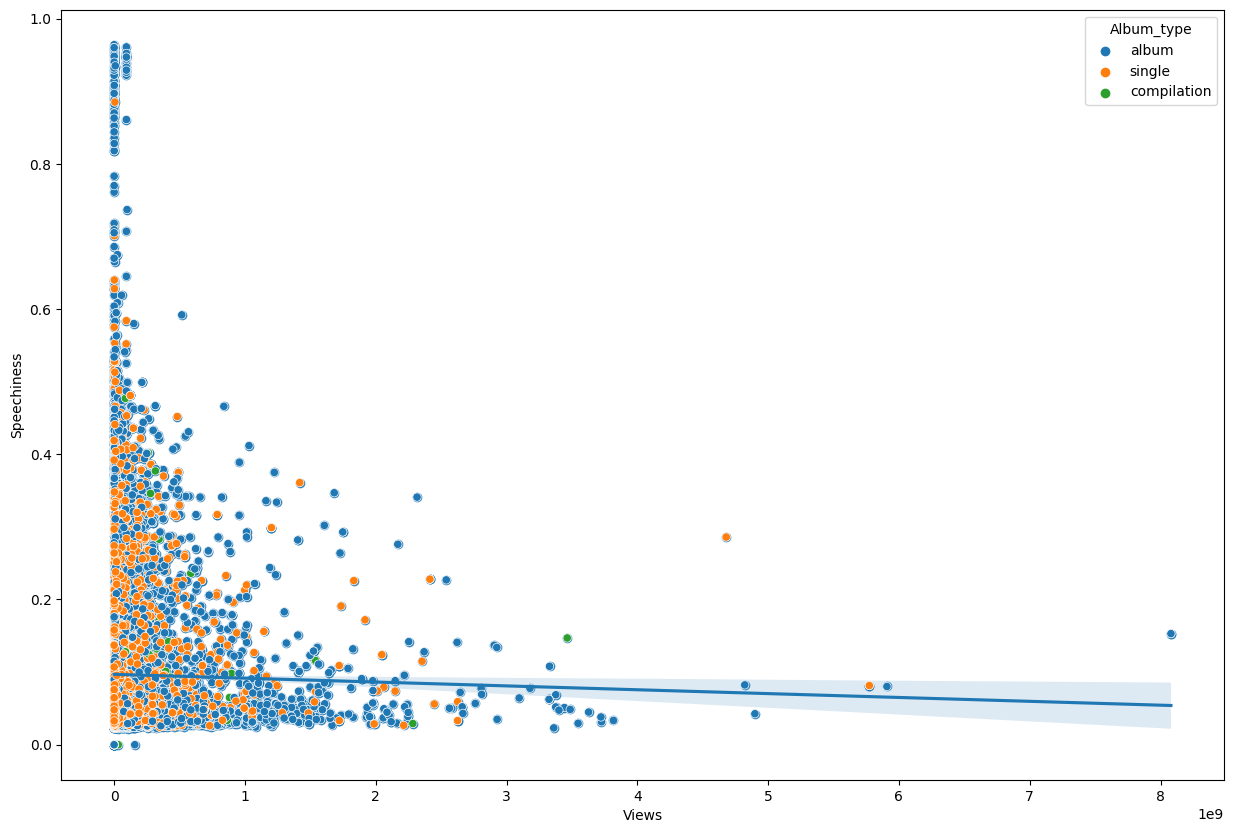

In [87]:
plt.figure(figsize=(15,10))
sns.regplot(y=data_df.Speechiness,x=data_df.Views,data=data_df)
sns.scatterplot(y=data_df.Speechiness,x=data_df.Views,hue=data_df.Album_type)

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<Axes: xlabel='Energy', ylabel='Views'>

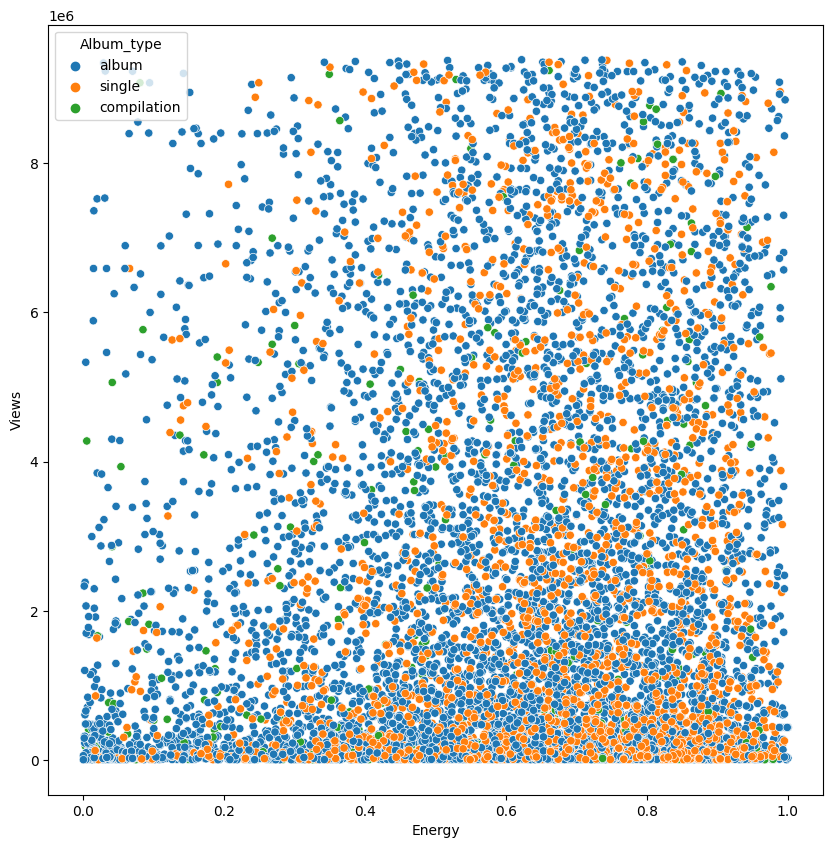

In [88]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=mean_view.Energy,y=mean_view.Views,hue=data_df.Album_type)

**TODO** - Scatterplot between number of likes to artist

In [89]:
likes=((data_df.groupby('Artist')['Likes'].sum()).sort_values(ascending=False)).head(100)
list_track=((data_df.groupby('Artist')['Track'].count()).sort_values(ascending=False)).head(100)

<BarContainer object of 100 artists>

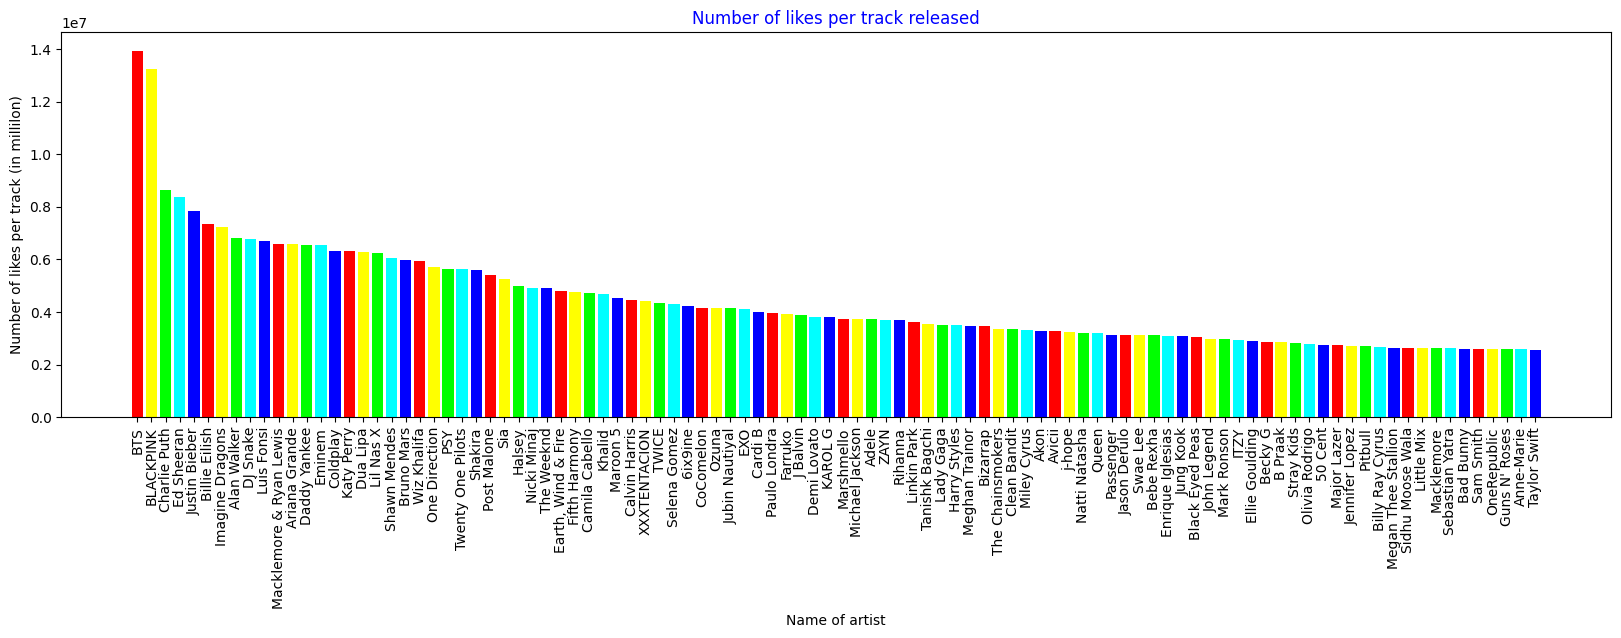

In [90]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.ylabel("Number of likes per track (in millilon)")
plt.xlabel("Name of artist")
plt.title("Number of likes per track released",color="blue")
plt.bar(likes.index,likes.values/list_track.values,color= ['#FF0000', '#FFFF00', '#00FF00', '#00FFFF', '#0000FF'])

Let us save and upload our work to Jovian before continuing

In [91]:
import jovian

In [92]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Asking and Answering Questions

We have ploted some of chart no we look into any specific relation between something



'Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'

In [93]:
data_df.Channel

0                   Gorillaz
1                   Gorillaz
2                   Gorillaz
3                   Gorillaz
4                   Gorillaz
                ...         
20713    SICK LEGEND - Topic
20714    SICK LEGEND - Topic
20715    SICK LEGEND - Topic
20716    SICK LEGEND - Topic
20717    SICK LEGEND - Topic
Name: Channel, Length: 20718, dtype: object

#### Q1: To find out most viewed channel from list of top 100 dansable song

In [94]:
top_dance_df=data_df.sort_values('Likes')[:100]

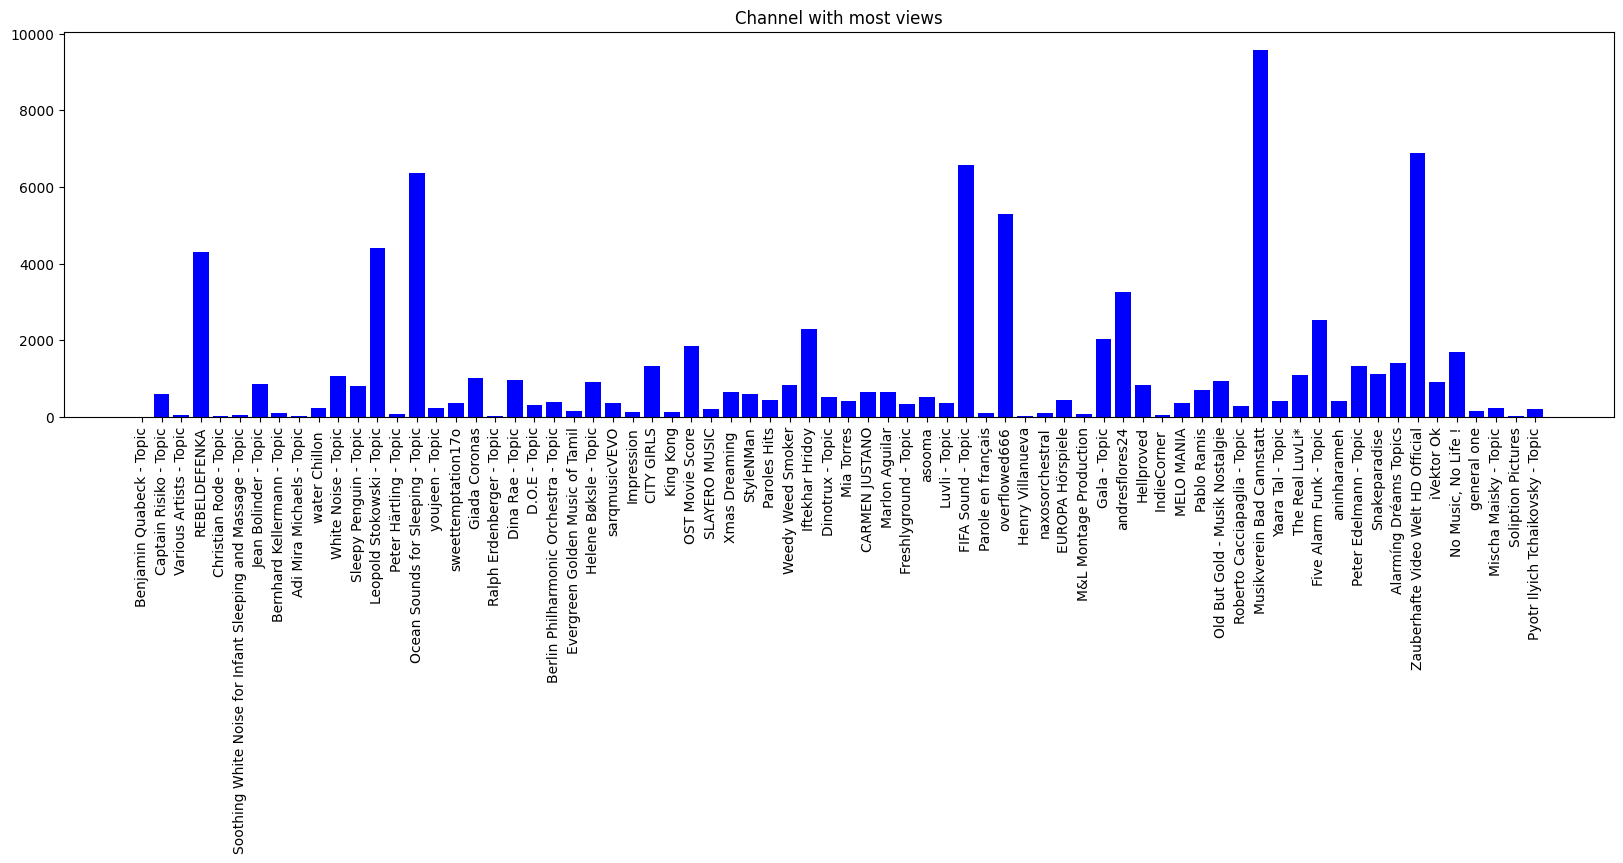

In [95]:
plt.figure(figsize=(20,5));
plt.title("Channel with most views");
plt.xticks(rotation=90);
plt.bar(top_dance_df.Channel.unique(),(top_dance_df.groupby('Channel')['Views'].sum())[:100],color="blue");

#### Q2: Plot chart b/w views and energy

the datasets  seems in have very high std

In [96]:
data_df.Views.mean()

93937821.13329712

In [97]:
#creating new dataset with removing top 100 viewed  songs
mean_view_df=data_df.sort_values('Views').tail(len(data_df)-100) #Take new df with excluding top 100 viewed with song

<Axes: xlabel='Energy', ylabel='Views'>

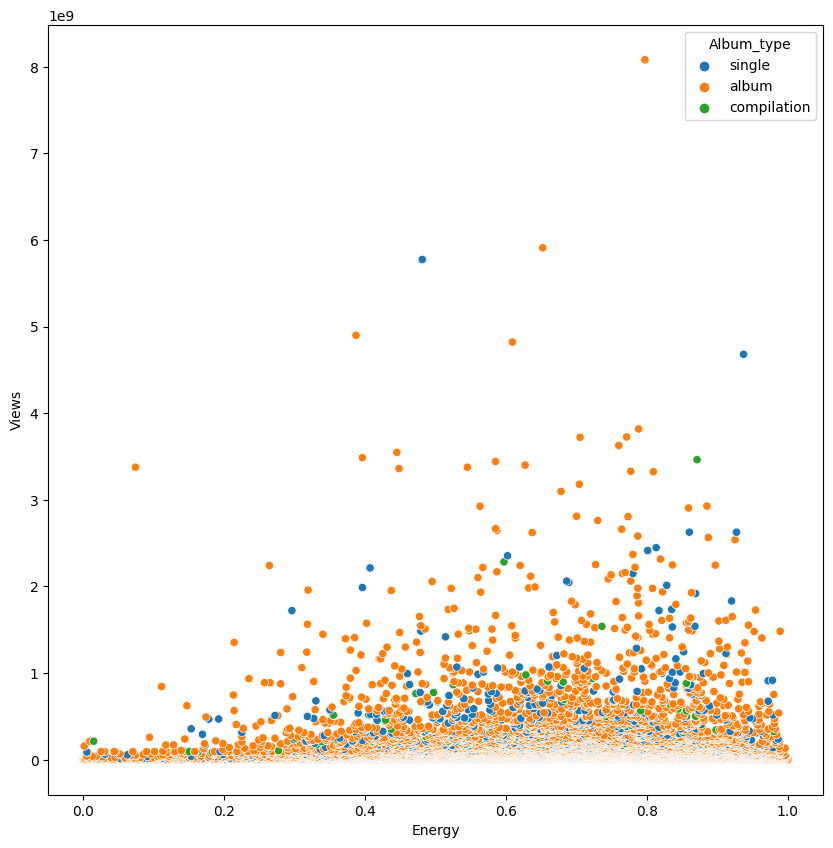

In [98]:
plt.figure(figsize=(10,10))
sns.scatterplot(y=mean_view_df.Views,x=mean_view_df.Energy,hue=mean_view_df.Album_type)

From the above chart its clear that energy is not much related to views. 

#### Q3: The release format of a song, whether it's part of an album or released as a single, can have an impact on its publicity and popularity, but there is no definitive rule that determines whether songs released as part of an album will have more views than standalone singles.

---
so to do that 


---



In [99]:
album_view=data_df.groupby('Album_type')['Views'].sum();

In [100]:
album_view

Album_type
album          1.467749e+12
compilation    6.301131e+10
single         4.154435e+11
Name: Views, dtype: float64

<BarContainer object of 3 artists>

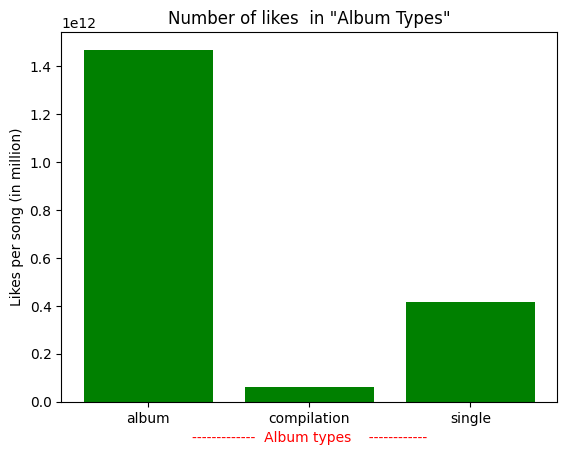

In [101]:
#plt.figure(figsize=(10,10))
plt.title("Number of likes  in \"Album Types\"")
plt.xlabel("-------------  Album types    ------------",color="red")
plt.ylabel("Likes per song (in million)")
plt.bar(album_view.index,album_view.values,color='green') 

When an album is released, it typically contains multiple songs, which can contribute to a higher overall view count. However, it's important to note that views are not directly comparable to likes, as views represent the number of times a song has been played or streamed, while likes indicate the number of people who have expressed their positive opinion or appreciation for a particular song.

To calculate likes per song for different types of releases, we can divide the total number of likes by the number of songs in the album or single. This calculation allows us to determine the average likes received per song, giving us a normalized metric for comparison.

In [102]:
album_count=data_df.groupby('Album_type')['Views'].count();

In [103]:
album_count

Album_type
album          14926
compilation      788
single          5004
Name: Views, dtype: int64

<BarContainer object of 3 artists>

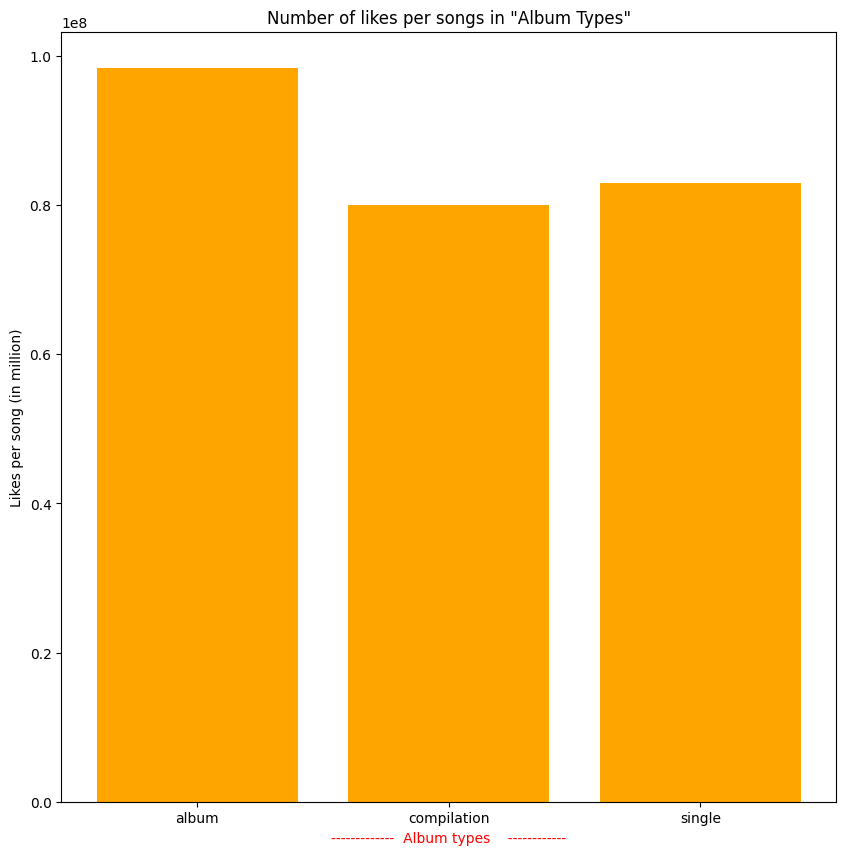

In [111]:
plt.figure(figsize=(10,10))
plt.title("Number of likes per songs in \"Album Types\"")
plt.xlabel("-------------  Album types    ------------",color="red")
plt.ylabel("Likes per song (in million)")
plt.bar(album_view.index,album_view.values/album_count.values,color="orange") 

When a song is part of an album, it can often receive more likes or engagement compared to standalone singles or compilation tracks. One reason for this is that when people discover and enjoy a song from an album, they tend to explore the other songs within the same album

#### Q4: Relation between Loudness and viewes

<Axes: title={'center': 'Views vs loudness'}, xlabel='Loudness of song', ylabel='Views(in billion)'>

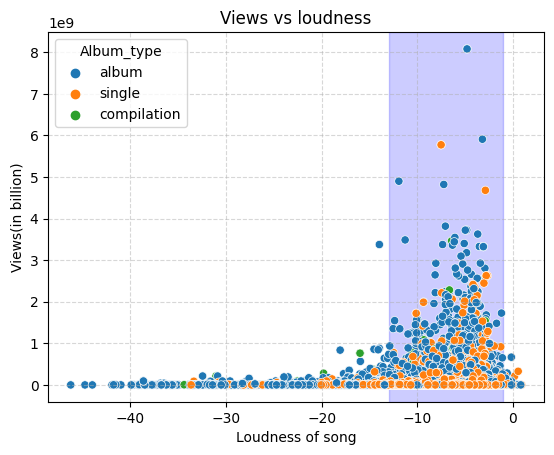

In [146]:
plt.title("Views vs loudness")
plt.ylabel("Views(in billion)")
plt.xlabel("Loudness of song")
plt.grid(True, linestyle='--', alpha=0.5)
plt.axvspan(-1, -13, color='blue', alpha=0.2)

sns.scatterplot(x=data_df.Loudness,y=data_df.Views,hue=data_df.Album_type)

The scatter plot reveals that songs with a loudness between 0 and -15 tend to have a higher number of views. 

#### Q5: scatter plot of views vs liveness

<Axes: title={'center': 'Views vs Liveness'}, xlabel='Liveness', ylabel='Views (in billion)'>

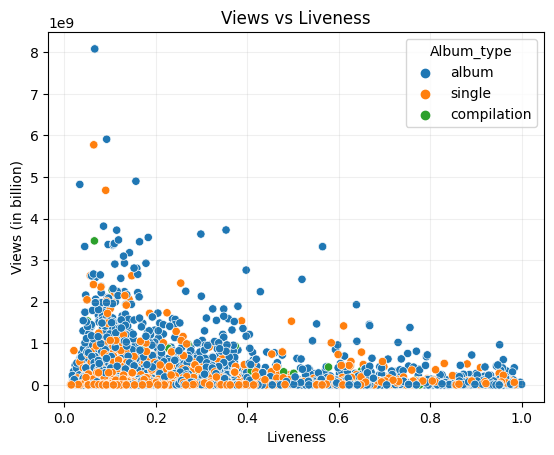

In [150]:
plt.title("Views vs Liveness")
plt.grid(True,alpha=.2)
plt.ylabel("Views (in billion)")
sns.scatterplot(x=data_df.Liveness,y=data_df.Views,hue=data_df.Album_type)

The scatter plot analysis reveals a notable correlation between liveness and views. Specifically, it indicates that songs with lower liveness tend to have a higher number of views.

In [105]:
import jovian

In [106]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Inferences and Conclusion

Based on the scatter plot analysis, it appears that there is no strong correlation between the energy of a song and its number of views. The distribution of views seems to be fairly consistent across different energy levels. This suggests that the energy of a song does not play a significant role in determining its popularity or viewer engagement.

It's important to note that the lack of correlation between energy and views does not imply that energy has no impact on a song's success. There could be other factors influencing the popularity of a song, such as the artist's reputation, marketing efforts, genre, lyrics, or cultural context. Additionally, individual preferences and tastes of listeners can vary, and what one person considers energetic may differ from another person's perception.

In summary, based on the scatter plot, it appears that energy alone may not be a decisive factor in driving the number of views a song receives. Further analysis and consideration of additional factors may be necessary to understand the various aspects contributing to a song's popularity.

In [107]:
import jovian

In [108]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## References and Future Work
Dataset link-https://www.kaggle.com/datasets/salvatorerastelli/spotify-and-youtube

In [109]:
import jovian

In [110]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.
